In [ ]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
from google.colab import files
import torch
from IPython.display import display


# Load TrOCR model and processor
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")

# Set model parameters
model.config.decoder_start_token_id = processor.tokenizer.cls_token_id
model.config.pad_token_id = processor.tokenizer.pad_token_id
model.config.vocab_size = model.config.decoder.vocab_size
model.config.eos_token_id = processor.tokenizer.sep_token_id
model.config.max_length = 10
model.config.early_stopping = True
model.config.no_repeat_ngram_size = 3
model.config.length_penalty = 2.0
model.config.num_beams = 4

# Upload image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]  # Get the uploaded file name
image = Image.open(image_path).convert("RGB")
display(image)



/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/224 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.12k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.17k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "qkv_bias": false,
  "transformers_version": "4.48.3"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_model": 1024,
  "decoder_attention_heads": 16,
  "decoder_ffn_dim": 4096,
  "decoder

generation_config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Saving 7A0mH.png to 7A0mH.png


In [ ]:
window_width = 5  # Start with 5px
widths = []
confidences = []

while window_width <= image.width:
    # Crop an expanding window from the left edge (0px)
    cropped_image = image.crop((0, 0, window_width, image.height)).convert("RGB")

    # Display the cropped image
    display(cropped_image)

    # Process the cropped image
    pixel_values = processor(cropped_image, return_tensors="pt").pixel_values

    # Generate text
    return_dict = model.generate(pixel_values, output_scores=True, return_dict_in_generate=True, temperature=2.0, repetition_penalty=3.0 )
    ids, scores = return_dict['sequences'], return_dict['sequences_scores']
    generated_text = processor.batch_decode(ids, skip_special_tokens=True)[0]

    # Convert log probability to normal probability
    probability = torch.exp(scores).item()
    widths.append(window_width)
    confidences.append(probability)


    # Print results
    print(f"🔹 Window 0px to {window_width}px TrOCR Output:", generated_text)
    print(f"🔹 Confidence Score (Log Prob):", scores.item())
    print(f"🔹 Confidence Score (Probability):", probability)
    print("=" * 50)  # Separator for readability

    # Expand window width by 5 pixels
    window_width += 2

/usr/local/lib/python3.11/dist-packages/transformers/generation/utils.py:1528: UserWarning: You have modified the pretrained model configuration to control generation. This is a deprecated strategy to control generation and will be removed in v5. Please use and modify the model generation configuration (see https://huggingface.co/docs/transformers/generation_strategies#default-text-generation-configuration )
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `2.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


🔹 Window 0px to 5px TrOCR Output: 2 2
🔹 Confidence Score (Log Prob): -0.11860855668783188
🔹 Confidence Score (Probability): 0.8881554007530212


🔹 Window 0px to 7px TrOCR Output: 2
🔹 Confidence Score (Log Prob): -0.10041661560535431
🔹 Confidence Score (Probability): 0.9044605493545532


🔹 Window 0px to 9px TrOCR Output: 2
🔹 Confidence Score (Log Prob): -0.11052258312702179
🔹 Confidence Score (Probability): 0.8953661322593689


🔹 Window 0px to 11px TrOCR Output: 2 2
🔹 Confidence Score (Log Prob): -0.26438939571380615
🔹 Confidence Score (Probability): 0.7676745653152466


🔹 Window 0px to 13px TrOCR Output: il
🔹 Confidence Score (Log Prob): -0.23559905588626862
🔹 Confidence Score (Probability): 0.7900974154472351


🔹 Window 0px to 15px TrOCR Output: 4
🔹 Confidence Score (Log Prob): -0.013990893959999084
🔹 Confidence Score (Probability): 0.9861065149307251


🔹 Window 0px to 17px TrOCR Output: 4
🔹 Confidence Score (Log Prob): -0.007972439751029015
🔹 Confidence Score (Probability): 0.9920592308044434


🔹 Window 0px to 19px TrOCR Output: 4 .
🔹 Confidence Score (Log Prob): -0.10900672525167465
🔹 Confidence Score (Probability): 0.8967244029045105


🔹 Window 0px to 21px TrOCR Output: 4i.
🔹 Confidence Score (Log Prob): -0.07196356356143951
🔹 Confidence Score (Probability): 0.9305647611618042


🔹 Window 0px to 23px TrOCR Output: 4.
🔹 Confidence Score (Log Prob): -0.05729871243238449
🔹 Confidence Score (Probability): 0.9443119168281555


🔹 Window 0px to 25px TrOCR Output: 42
🔹 Confidence Score (Log Prob): -0.1323748677968979
🔹 Confidence Score (Probability): 0.8760125637054443


🔹 Window 0px to 27px TrOCR Output: 4.
🔹 Confidence Score (Log Prob): -0.16697733104228973
🔹 Confidence Score (Probability): 0.8462187647819519


🔹 Window 0px to 29px TrOCR Output: 44
🔹 Confidence Score (Log Prob): -0.00456326873973012
🔹 Confidence Score (Probability): 0.9954470992088318


🔹 Window 0px to 31px TrOCR Output: 44
🔹 Confidence Score (Log Prob): -0.016025196760892868
🔹 Confidence Score (Probability): 0.9841025471687317


🔹 Window 0px to 33px TrOCR Output: 44.
🔹 Confidence Score (Log Prob): -0.09392853081226349
🔹 Confidence Score (Probability): 0.9103478193283081


🔹 Window 0px to 35px TrOCR Output: 44.
🔹 Confidence Score (Log Prob): -0.1136324405670166
🔹 Confidence Score (Probability): 0.8925859928131104


🔹 Window 0px to 37px TrOCR Output: 449
🔹 Confidence Score (Log Prob): -0.0707494243979454
🔹 Confidence Score (Probability): 0.9316953420639038


🔹 Window 0px to 39px TrOCR Output: 449
🔹 Confidence Score (Log Prob): -0.04965965822339058
🔹 Confidence Score (Probability): 0.951553225517273


🔹 Window 0px to 41px TrOCR Output: 449
🔹 Confidence Score (Log Prob): -0.03488171473145485
🔹 Confidence Score (Probability): 0.9657196402549744


🔹 Window 0px to 43px TrOCR Output: 449
🔹 Confidence Score (Log Prob): -0.0193940456956625
🔹 Confidence Score (Probability): 0.9807928204536438


🔹 Window 0px to 45px TrOCR Output: 449
🔹 Confidence Score (Log Prob): -0.02473042532801628
🔹 Confidence Score (Probability): 0.9755728840827942


🔹 Window 0px to 47px TrOCR Output: 449 .
🔹 Confidence Score (Log Prob): -0.06659536063671112
🔹 Confidence Score (Probability): 0.9355736970901489


🔹 Window 0px to 49px TrOCR Output: 449 .
🔹 Confidence Score (Log Prob): -0.057418935000896454
🔹 Confidence Score (Probability): 0.9441984295845032


🔹 Window 0px to 51px TrOCR Output: 449 .
🔹 Confidence Score (Log Prob): -0.05976063013076782
🔹 Confidence Score (Probability): 0.9419899582862854


🔹 Window 0px to 53px TrOCR Output: 449 .
🔹 Confidence Score (Log Prob): -0.048954691737890244
🔹 Confidence Score (Probability): 0.9522242546081543


🔹 Window 0px to 55px TrOCR Output: 449 .
🔹 Confidence Score (Log Prob): -0.036761943250894547
🔹 Confidence Score (Probability): 0.9639055728912354


🔹 Window 0px to 57px TrOCR Output: 449.
🔹 Confidence Score (Log Prob): -0.10844603180885315
🔹 Confidence Score (Probability): 0.8972273468971252


🔹 Window 0px to 59px TrOCR Output: 449.1
🔹 Confidence Score (Log Prob): -0.004468607250601053
🔹 Confidence Score (Probability): 0.9955413341522217


🔹 Window 0px to 61px TrOCR Output: 449.1
🔹 Confidence Score (Log Prob): -0.004198904149234295
🔹 Confidence Score (Probability): 0.9958099126815796


🔹 Window 0px to 63px TrOCR Output: 449.1
🔹 Confidence Score (Log Prob): -0.005492027848958969
🔹 Confidence Score (Probability): 0.9945230484008789


🔹 Window 0px to 65px TrOCR Output: 449.1
🔹 Confidence Score (Log Prob): -0.01698332466185093
🔹 Confidence Score (Probability): 0.9831600785255432


🔹 Window 0px to 67px TrOCR Output: 449.1,
🔹 Confidence Score (Log Prob): -0.054584503173828125
🔹 Confidence Score (Probability): 0.9468784928321838


🔹 Window 0px to 69px TrOCR Output: 449.1 (
🔹 Confidence Score (Log Prob): -0.06465187668800354
🔹 Confidence Score (Probability): 0.9373937249183655


🔹 Window 0px to 71px TrOCR Output: 449. 1 (
🔹 Confidence Score (Log Prob): -0.06981904804706573
🔹 Confidence Score (Probability): 0.932562530040741


🔹 Window 0px to 73px TrOCR Output: 449. 1 (
🔹 Confidence Score (Log Prob): -0.08140559494495392
🔹 Confidence Score (Probability): 0.9218197464942932


🔹 Window 0px to 75px TrOCR Output: 449.1,
🔹 Confidence Score (Log Prob): -0.09426945447921753
🔹 Confidence Score (Probability): 0.9100375175476074


🔹 Window 0px to 77px TrOCR Output: 449.10
🔹 Confidence Score (Log Prob): -0.010674878023564816
🔹 Confidence Score (Probability): 0.9893819093704224


🔹 Window 0px to 79px TrOCR Output: 449.10
🔹 Confidence Score (Log Prob): -0.005296184681355953
🔹 Confidence Score (Probability): 0.9947178363800049


🔹 Window 0px to 81px TrOCR Output: 449.10
🔹 Confidence Score (Log Prob): -0.0022600542288273573
🔹 Confidence Score (Probability): 0.9977424740791321


🔹 Window 0px to 83px TrOCR Output: 449.10
🔹 Confidence Score (Log Prob): -0.0018752791220322251
🔹 Confidence Score (Probability): 0.9981265068054199


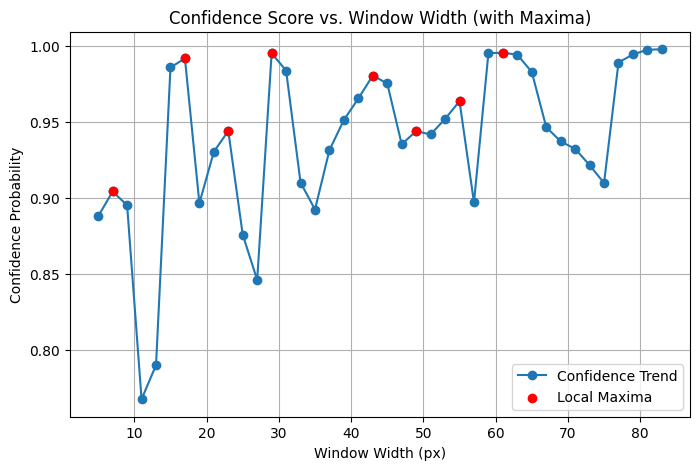

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import argrelextrema

widths = np.array(widths)
confidences = np.array(confidences)

# Find local maxima (peaks)
local_max_indices = argrelextrema(confidences, np.greater)[0]

# Plot the graph
plt.figure(figsize=(8, 5))
plt.plot(widths, confidences, marker='o', linestyle='-', label="Confidence Trend")

# Highlight maxima
plt.scatter(widths[local_max_indices], confidences[local_max_indices], color='red', label="Local Maxima", zorder=3)

# Labels and title
plt.xlabel("Window Width (px)")
plt.ylabel("Confidence Probability")
plt.title("Confidence Score vs. Window Width (with Maxima)")
plt.legend()
plt.grid()
plt.show()


In [ ]:
cropped_image = image.crop((0, 0, window_width, image.height)).convert("RGB")
prev=0;
for max_window_width in local_max_indices:
  if (confidences[max_window_width]<0.95):
    continue
  cropped_image = image.crop((prev, 0, widths[max_window_width], image.height)).convert("RGB")
  display(cropped_image)
  prev=widths[max_window_width]
cropped_image = image.crop((prev, 0, widths[-1], image.height)).convert("RGB")
display(cropped_image)